<a href="https://colab.research.google.com/github/dldlstjq/machine-learning-practice/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

Tensor("X_1:0", dtype=float32)
Tensor("Y_1:0", dtype=float32)
0 8.211115 [0.5774583] [1.2861502]
1 0.31356764 [0.4573705] [1.1979369]
2 0.2089942 [0.48464996] [1.1754013]
3 0.1979956 [0.4954828] [1.1464611]
4 0.18857785 [0.507781] [1.1189758]
5 0.17962013 [0.51959515] [1.0920682]
6 0.171088 [0.53114575] [1.0658165]
7 0.16296123 [0.54241645] [1.040195]
8 0.15522046 [0.55341643] [1.0151894]
9 0.1478474 [0.564152] [0.99078494]
10 0.14082448 [0.5746295] [0.96696717]
11 0.13413526 [0.58485514] [0.94372195]
12 0.12776367 [0.59483486] [0.92103547]
13 0.1216948 [0.6045748] [0.8988944]
14 0.11591425 [0.61408055] [0.8772856]
15 0.110408224 [0.6233578] [0.8561962]
16 0.10516373 [0.6324121] [0.8356139]
17 0.100168385 [0.6412486] [0.8155263]
18 0.095410325 [0.6498727] [0.7959216]
19 0.090878285 [0.65828955] [0.77678823]
20 0.086561464 [0.66650397] [0.75811476]
21 0.08244973 [0.674521] [0.7398902]
22 0.078533314 [0.6823453] [0.7221038]
23 0.074802935 [0.6899815] [0.70474494]
24 0.07124973 [0.6974340

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heights.csv to heights.csv
User uploaded file "heights.csv" with length 2554 bytes


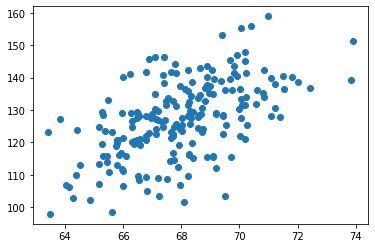

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heights.csv")
df.head()

X = df["height"]
y = df["weight"]
plt.plot(X, y, 'o')
plt.show()

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

In [ ]:
line_fitter.predict([[70]])

array([134.2596226])

In [ ]:
line_fitter.coef_

array([3.43267613])

In [ ]:
line_fitter.intercept_

-106.02770644878137

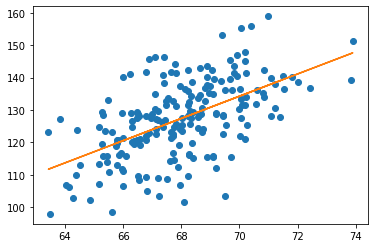

In [ ]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()